In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
os.chdir("/home/pchabets/Dropbox/STRESS_INDEX/")

### Load in transcriptomics data

In [3]:
expr_train = pd.read_csv("data/blood_and_saliva_variables/W1/transcriptomics/transcriptomics_2ychronicity_TRAIN.csv")
expr_test = pd.read_csv("data/blood_and_saliva_variables/W1/transcriptomics/transcriptomics_2ychronicity_TEST.csv")

### Check for highest variance in train data

In [4]:
probe_variance = expr_train.iloc[:,2:].apply(lambda x: x.var(), axis=0)
probe_variance.sort_values(ascending=False)

XIST.3             11.033642
XIST.1             10.722610
TXLNG2P.7           6.707330
EIF1AY              6.628190
HLA.C               5.777277
                     ...    
NETO1.1             0.013865
AC005754.1          0.013729
HBB                 0.012588
HBB.1               0.011486
no_annotation.1     0.010325
Length: 44241, dtype: float64

<AxesSubplot:ylabel='Count'>

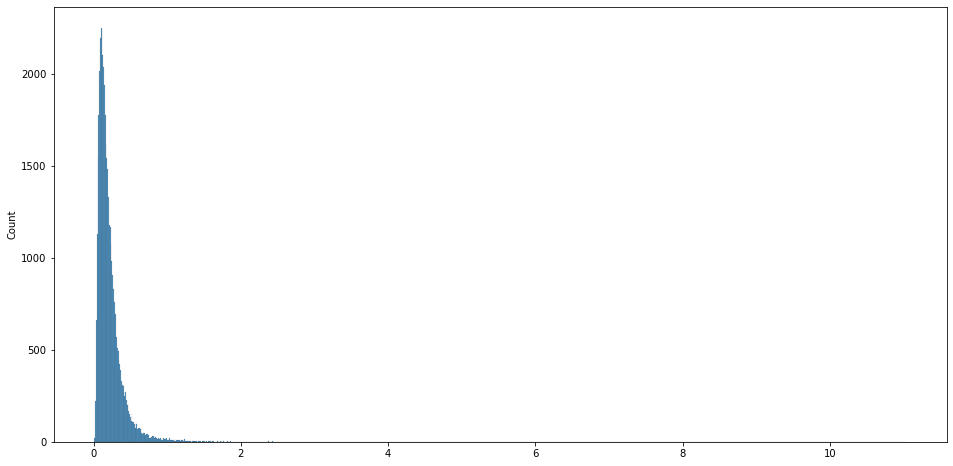

In [34]:
# plot distribution of variances
plt.figure(figsize=(16,8))
sns.histplot(probe_variance, bins=1000)

### Select only top variance probes 

In [39]:
# set top n probes with highest variance
top = 5000

In [40]:
# select top highest variance probes
selected_probes = probe_variance.sort_values(ascending=False)[0:top]

<AxesSubplot:ylabel='Count'>

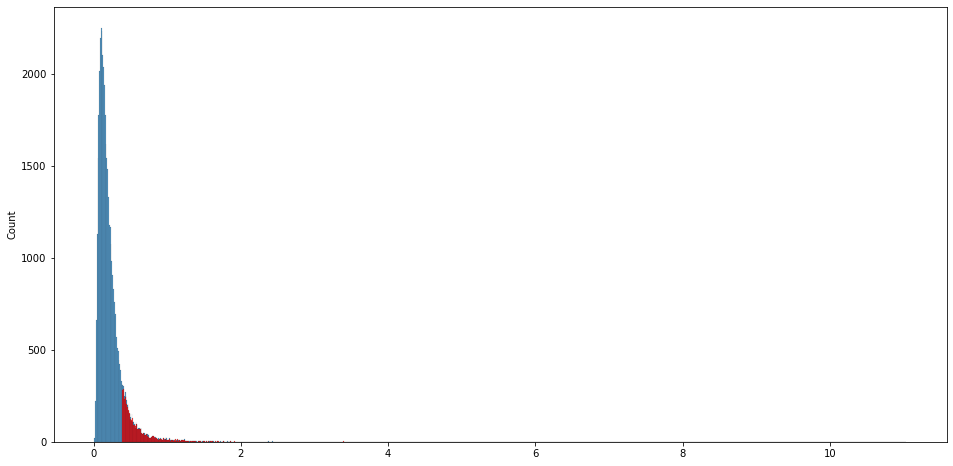

In [41]:
# plot distribution of top variances
plt.figure(figsize=(16,8))
sns.histplot(probe_variance, bins=1000)
sns.histplot(selected_probes, bins=1000, color='red')

### Transform train and test set to only include top variance probes (from train data)

In [42]:
selected_train = expr_train[expr_train.columns[0:2].append(selected_probes.index)]

In [43]:
selected_test = expr_test[expr_test.columns[0:2].append(selected_probes.index)]

### Write to file

In [44]:
# Train 
selected_train.to_csv("scripts/VM/Python/output/transcriptomics_variance_selection_top_{}_TRAIN.csv".format(top))

In [45]:
# Test
selected_test.to_csv("scripts/VM/Python/output/transcriptomics_variance_selection_top_{}_TEST.csv".format(top))